In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, dct, idct
from scipy.signal import get_window
from sklearn.preprocessing import StandardScaler

In [ ]:
!rm -rf SIG-Challenge

In [ ]:
!git clone https://github.com/nikhil1234108/SIG-Challenge.git

Cloning into 'SIG-Challenge'...
remote: Enumerating objects: 3040, done.
remote: Counting objects: 100% (998/998), done.
remote: Compressing objects: 100% (908/908), done.
remote: Total 3040 (delta 30), reused 973 (delta 12), pack-reused 2042 (from 1)
Receiving objects: 100% (3040/3040), 555.77 MiB | 24.05 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Updating files: 100% (2024/2024), done.
Filtering content: 100% (510/510), 419.99 MiB | 31.88 MiB/s, done.
Encountered 1000 file(s) that should have been pointers, but weren't:
	ICASSP2023/blind_data/000e74c5-8a15-4dc6-b226-65cfe541e569.wav
	ICASSP2023/blind_data/00aa9abf-6ab0-4ea3-99c3-bb10e5b5ae42.wav
	ICASSP2023/blind_data/00ddf01f-2dbd-4a53-a299-b4d71db645a7.wav
	ICASSP2023/blind_data/00f9d3ad-813d-4ab2-895b-715f1b37e402.wav
	ICASSP2023/blind_data/01492411-52e7-494d-a2ff-b0404ea1d7ef.wav
	ICASSP2023/blind_data/01adc9a5-fe63-48e5-9afa-689a58f05c01.wav
	ICASSP2023/blind_data/01b56d03-c0f2-4fb4-a4d5-45dd065559be.wav
	ICASSP2023/blin

In [ ]:
!pip install librosa
import librosa
import os

def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=16000)
    return y, sr

audio_folder = 'SIG-Challenge/ICASSP2024'
audio_files = librosa.util.find_files(audio_folder)

for file in audio_files:
    signal, sr = load_audio(file)
    print(f"Loaded file: {file}")


Loaded file: /content/SIG-Challenge/ICASSP2024/blind_data/000e74c5-8a15-4dc6-b226-65cfe541e569.wav
Loaded file: /content/SIG-Challenge/ICASSP2024/blind_data/00819efb-5194-44ca-ad15-7504c49619a8.wav
Loaded file: /content/SIG-Challenge/ICASSP2024/blind_data/00ddf01f-2dbd-4a53-a299-b4d71db645a7.wav
Loaded file: /content/SIG-Challenge/ICASSP2024/blind_data/00f9d3ad-813d-4ab2-895b-715f1b37e402.wav
Loaded file: /content/SIG-Challenge/ICASSP2024/blind_data/01492411-52e7-494d-a2ff-b0404ea1d7ef.wav
Loaded file: /content/SIG-Challenge/ICASSP2024/blind_data/01b56d03-c0f2-4fb4-a4d5-45dd065559be.wav
Loaded file: /content/SIG-Challenge/ICASSP2024/blind_data/01c69d6f-bcc2-40a2-98a9-017f3c587868.wav
Loaded file: /content/SIG-Challenge/ICASSP2024/blind_data/01d616a5-a47d-449e-a0a4-336bd009e4da.wav
Loaded file: /content/SIG-Challenge/ICASSP2024/blind_data/024131c0-4248-4b3a-96e7-2ad0cca899f0.wav
Loaded file: /content/SIG-Challenge/ICASSP2024/blind_data/02ece67b-1c37-4150-86b9-e6046dd212f4.wav
Loaded fil

In [ ]:
import numpy as np

def calculate_snr(signal, noise):
    signal_power = np.mean(signal ** 2)

    noise_power = np.mean(noise ** 2)

    snr = 10 * np.log10(signal_power / noise_power)
    return snr

signal = signal
noise = np.random.rand(signal.shape[0]) * 0.1
snr_value = calculate_snr(signal, noise)

print(f"Calculated SNR: {snr_value} dB")

Calculated SNR: -6.097799318739971 dB


In [ ]:
signal

array([-3.6303391e-06, -3.8933453e-05,  6.5367465e-05, ...,
        1.9505052e-04,  1.7473634e-04,  1.4082986e-04], dtype=float32)

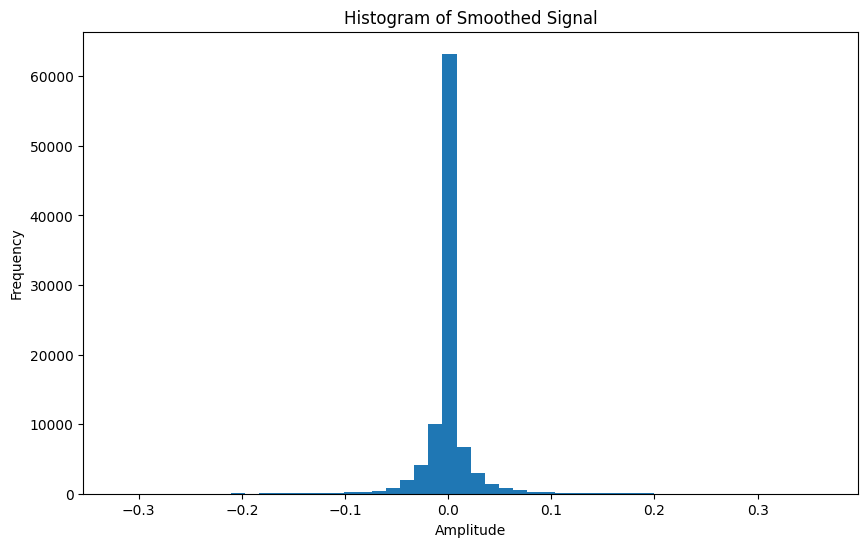

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(signal, bins=50)  # Create histogram with 50 bins

plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.title('Histogram of Smoothed Signal')

plt.show()

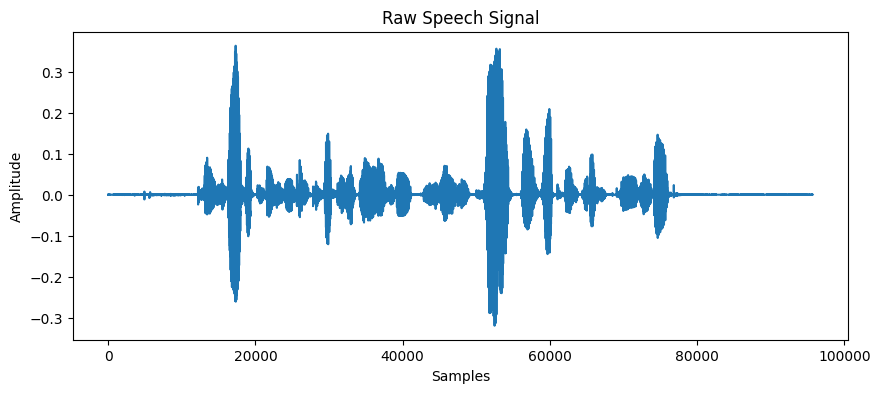

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Raw Speech Signal')
plt.show()


FRAMING


In [ ]:
print(f"Signal shape: {signal.shape}")
print(f"Sample rate: {sr}")
print(f"Signal duration: {len(signal) / sr} seconds")

Signal shape: (95694,)
Sample rate: 16000
Signal duration: 5.980875 seconds


In [ ]:
def framing(signal,frame_size,hop_size):
  num_frames = np.ceil(len(signal)-frame_size/hop_size)+1
  pad_signal_length = int(num_frames*hop_size+frame_size)
  pad_signal = np.append(signal,np.zeros(pad_signal_length-len(signal)))
  frames = []
  for i in range(0,len(pad_signal)-frame_size,hop_size):
    frames.append(pad_signal[i:i+frame_size])
    return np.array(frames)



In [ ]:
frame_size=1024
hop_size=256
frames=framing(signal,frame_size,hop_size)
print(f"Frames shape: {frames.shape}")

Frames shape: (1, 1024)


WINDOWING

In [ ]:
from scipy.signal import get_window
def apply_window(frames,window_type='blackman'):
  window=get_window(window_type,frames.shape[1],fftbins=True)
  return frames*window

In [ ]:
frames=apply_window(frames)
print(f"frame_shape:{frames.shape}")

frame_shape:(1, 1024)


In [ ]:
frames

array([[ 5.03810750e-23, -1.31926232e-10,  8.86028282e-10, ...,
         5.46553029e-09,  2.40898408e-09,  3.06441626e-10]])

overlapping

In [ ]:
def overlap_add(frames,hop_size=256):
  if len(frames.shape) == 1:
    frames = frames.reshape(1, -1)
  frame_size=frames.shape[1]
  signal_length = frames.shape[0]*hop_size+frame_size
  signal = np.zeros(signal_length)
  for i in range(frames.shape[0]):
    signal[i*hop_size:i*hop_size+frame_size]+=frames[i]
  return signal

In [ ]:
frames=overlap_add(frames,hop_size=hop_size)
print(f"frame_shape:{frames.shape}")

frame_shape:(1280,)


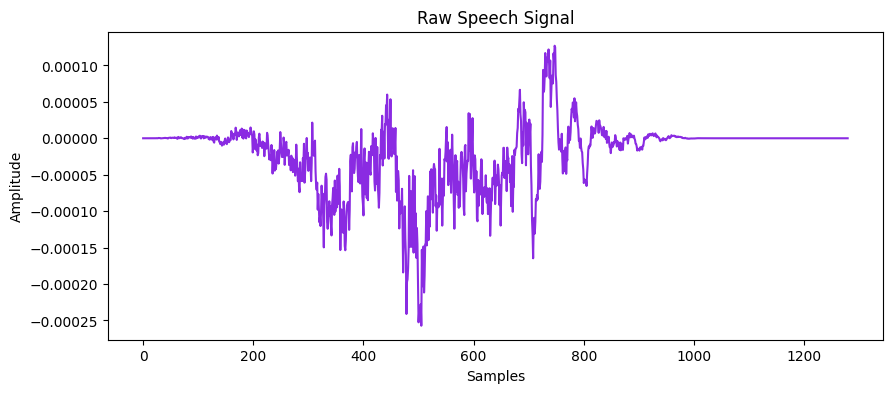

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(frames,color='#8A2BE2')
plt.title('Raw Speech Signal')
plt.show()


transformation


In [ ]:
def transform(frames, method='fft'):
    if method == 'fft':
        return fft(frames, axis=-1)
    elif method == 'dct':
        return dct(frames, type=2, axis=-1, norm='ortho')


In [ ]:
transformed_signal=transform(frames)
print(f"frame_shape:{transformed_signal.shape}")

frame_shape:(1280,)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


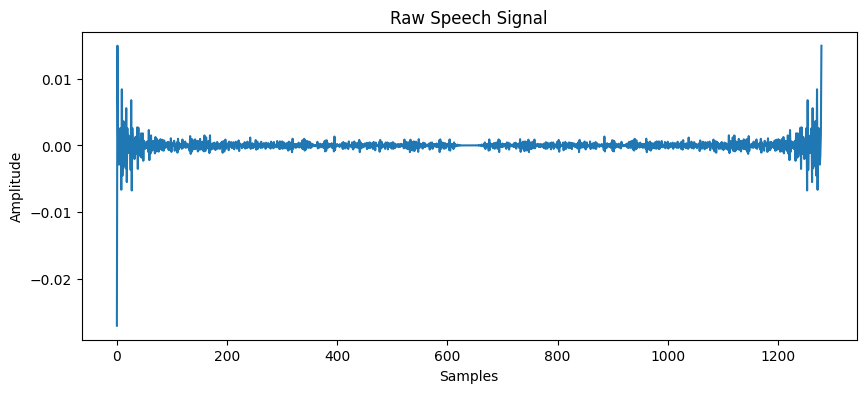

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(transformed_signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Raw Speech Signal')
plt.show()


filtering

In [ ]:
import numpy as np

def kalman_filter(transformed_signal, process_noise_level=1e-5, measurement_noise_level=0.1):
  n_samples = len(transformed_signal)
  state_estimate = np.zeros(2)
  state_covariance = np.eye(2)
  state_transition = np.array([[1, 1], [0, 1]])
  measurement_model = np.array([[1, 0]])
  process_noise_covariance = process_noise_level * np.eye(2)
  measurement_noise_covariance = np.array([[measurement_noise_level]])
  kalman_gain = np.zeros(2)
  filtered_signal = np.zeros(n_samples)

  for k in range(n_samples):
    state_estimate = state_transition @ state_estimate
    state_covariance = state_transition @ state_covariance @ state_transition.T + process_noise_covariance

    measurement = transformed_signal[k]
    measurement_covariance = measurement_model @ state_covariance @ measurement_model.T + measurement_noise_covariance
    kalman_gain = state_covariance @ measurement_model.T @ np.linalg.inv(measurement_covariance)
    state_estimate = state_estimate + kalman_gain @ (measurement - measurement_model @ state_estimate)
    state_covariance = (np.eye(2) - kalman_gain @ measurement_model) @ state_covariance

    filtered_signal[k] = state_estimate[0]

  return filtered_signal

In [ ]:
filtered_signal=kalman_filter(transformed_signal)
print(f"frame_shape:{filtered_signal.shape}")

frame_shape:(1280,)


<ipython-input-162-975a3c33a850>:24: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_signal[k] = state_estimate[0]


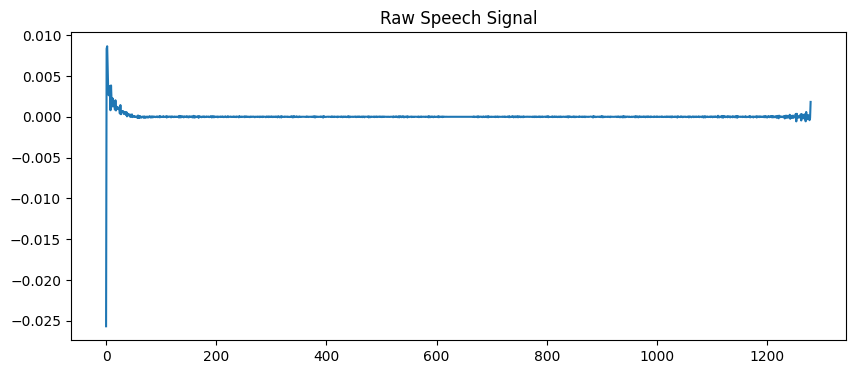

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(filtered_signal)
plt.title('Raw Speech Signal')
plt.show()


inverse transformation

In [ ]:
def inverse_transform(filtered_signal, method='ifft'):
    if method == 'ifft':
        return ifft(filtered_signal, axis=-1).real
    elif method == 'idct':
        return idct(filtered_signal, type=2, axis=-1, norm='ortho')


In [ ]:
Itrans_signal = inverse_transform(filtered_signal).real * (filtered_signal.shape[0] / 2)
print(f"frame_shape:{Itrans_signal.shape}")

frame_shape:(1280,)


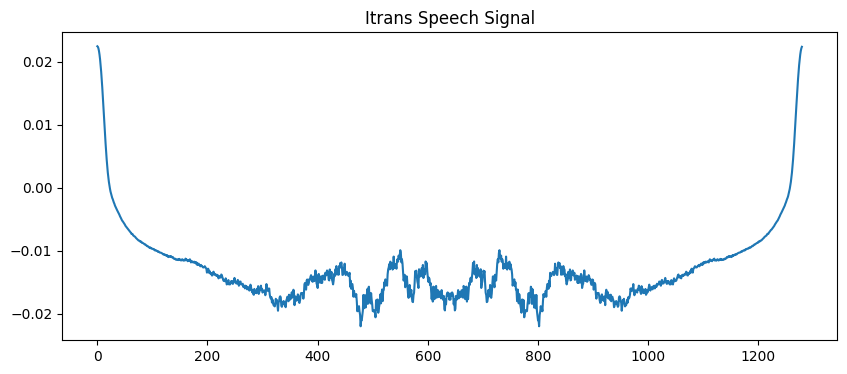

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(Itrans_signal)
plt.title('Itrans Speech Signal')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
signal1 = np.random.randn(Itrans_signal.shape[0])
def normalize_signal(signal1):
    return signal / np.max(np.abs(signal))

normalized_signal = normalize_signal(signal1)


In [ ]:
normalized_signal

array([-9.9915615e-06, -1.0715418e-04,  1.7990691e-04, ...,
        5.3682574e-04,  4.8091623e-04,  3.8759748e-04], dtype=float32)

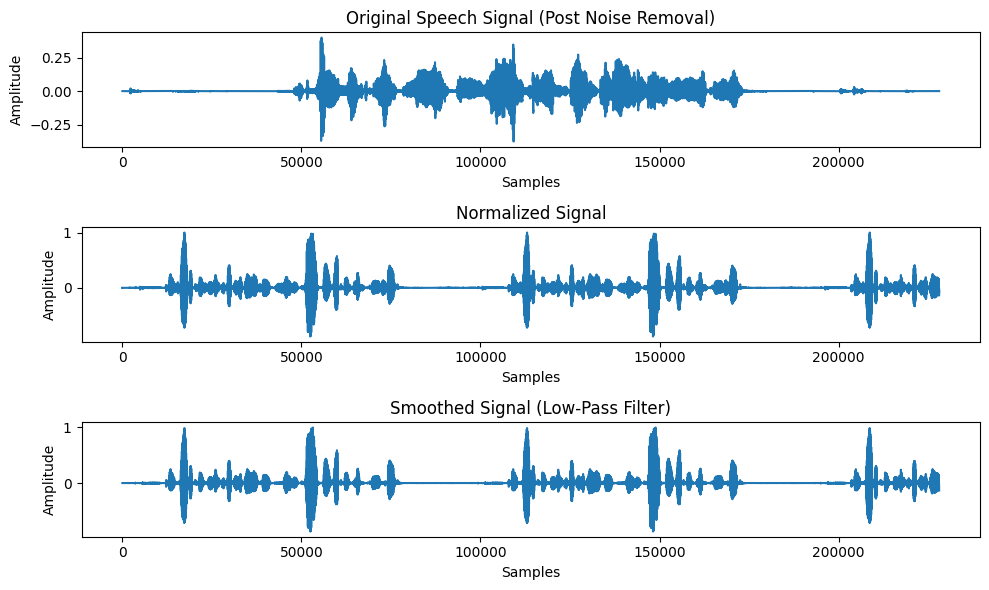

In [ ]:
def butter_lowpass_filter(normalized_signal, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, normalized_signal)
    return y

cutoff_frequency = 3400
sample_rate = 16000
smoothed_signal = butter_lowpass_filter(normalized_signal, cutoff_frequency, sample_rate)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title("Original Speech Signal (Post Noise Removal)")

plt.subplot(3, 1, 2)
plt.plot(normalized_signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title("Normalized Signal")

plt.subplot(3, 1, 3)
plt.plot(smoothed_signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title("Smoothed Signal (Low-Pass Filter)")

plt.tight_layout()
plt.show()

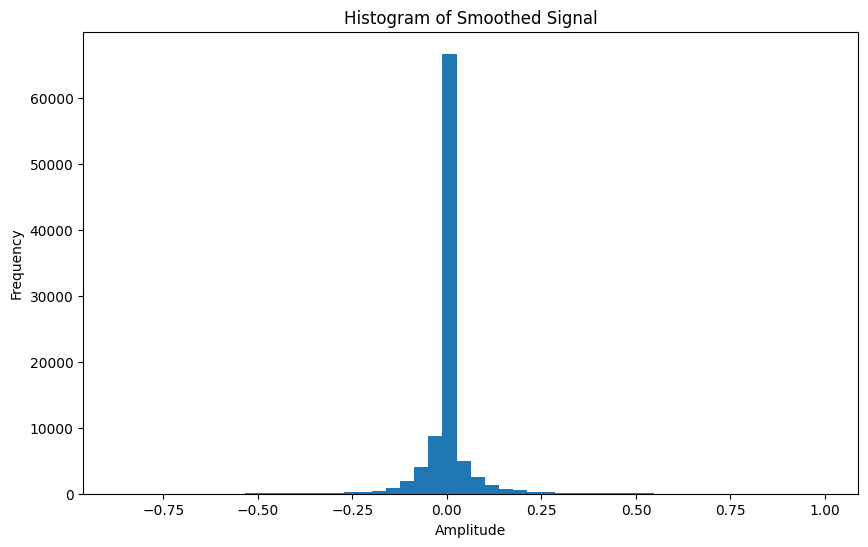

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'smoothed_signal' is your 1D signal
plt.figure(figsize=(10, 6))
plt.hist(smoothed_signal, bins=50)  # Create histogram with 50 bins

plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.title('Histogram of Smoothed Signal')

plt.show()

In [ ]:
def extract_mfcc(smoothed_signal, sr, n_mfcc=13,n_fft=512):
    mfcc_features = librosa.feature.mfcc(y=Itrans_signal, sr=sr, n_mfcc=n_mfcc,n_fft=n_fft)
    return mfcc_features.T


In [ ]:
features=extract_mfcc(Itrans_signal,sr)
print(f"frame_shape:{features.shape}")

frame_shape:(3, 13)


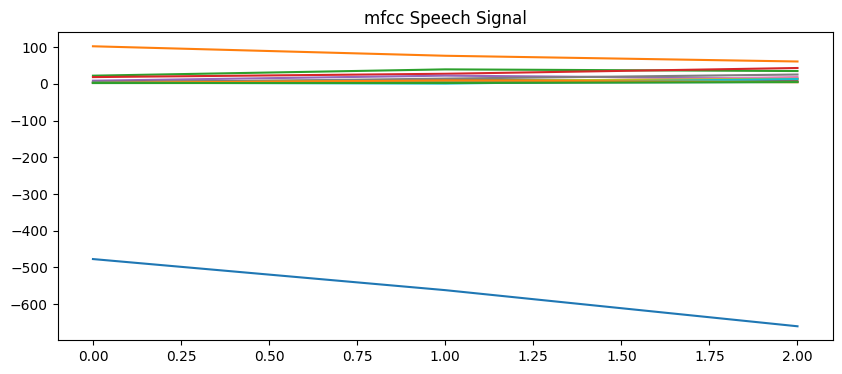

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(features)
plt.title('mfcc Speech Signal')
plt.show()


Original signal length: 228096
Processed signal length: 228096


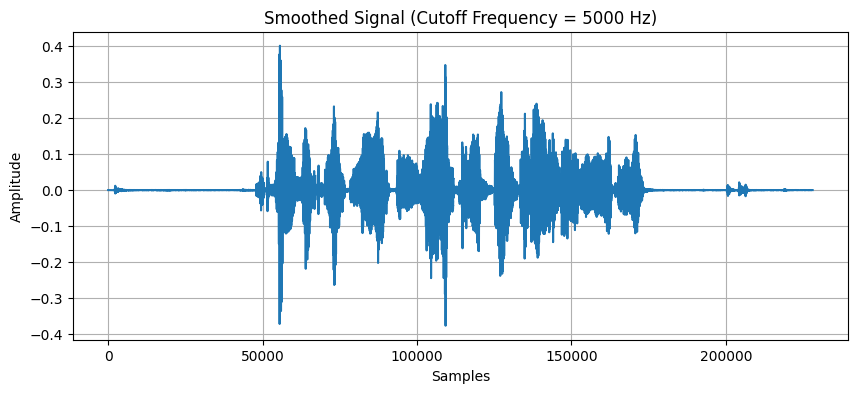

SNR Value: 27.63 dB


In [ ]:
!pip install soundfile
import soundfile as sf
import numpy as np
import librosa
import librosa.display
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt


def calculate_snr(original_signal, processed_signal):
  if len(original_signal) != len(processed_signal):
    return None

  original_signal_power = np.sum(original_signal**2)

  noise_power = np.sum((original_signal - processed_signal)**2)

  snr = 10 * np.log10(original_signal_power / noise_power)

  return snr


input_file = '/content/SIG-Challenge/ICASSP2024/blind_data/b5caef32-3030-45f1-a5ba-2b7f1ec1895c.wav'
signal, sample_rate = sf.read(input_file)

cutoff_frequency = [2000, 3000, 5000]
for cutoff in cutoff_frequency:
    smoothed_signal = butter_lowpass_filter(signal, cutoff, sample_rate)
print(f"Original signal length: {len(signal)}")
print(f"Processed signal length: {len(smoothed_signal)}")


snr_value = calculate_snr(signal, smoothed_signal)
plt.figure(figsize=(10, 4))
plt.plot(smoothed_signal)
plt.title(f"Smoothed Signal (Cutoff Frequency = {cutoff} Hz)")
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
if snr_value is not None:
    print(f"SNR Value: {snr_value:.2f} dB")

In [ ]:
from IPython.display import Audio


audio = Audio(data=smoothed_signal, rate=sample_rate)

display(audio)

In [ ]:
from IPython.display import Audio


audio = Audio(data=signal, rate=sample_rate)

display(audio)

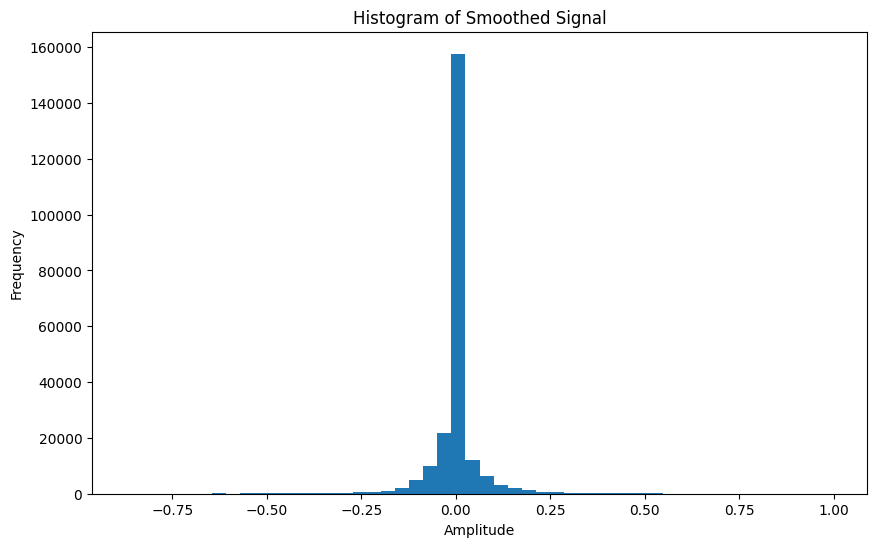

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(smoothed_signal, bins=50)  # Create histogram with 50 bins

plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.title('Histogram of Smoothed Signal')

plt.show()

In [ ]:
import os
import soundfile as sf

dataset_directory = '/content/SIG-Challenge/ICASSP2024/blind_data/'

cutoff_frequency = 5000

snr_values = []

for file_name in os.listdir(dataset_directory):
    if file_name.endswith('.wav'):
        file_path = os.path.join(dataset_directory, file_name)

        signal, sample_rate = sf.read(file_path)

        smoothed_signal = butter_lowpass_filter(signal, cutoff_frequency, sample_rate)

        snr_value = calculate_snr(signal, smoothed_signal)
        if snr_value is not None:
            snr_values.append(snr_value)
            print(f"File: {file_name}, SNR: {snr_value:.2f} dB")

if snr_values:
    average_snr = np.mean(snr_values)
    print(f"\nAverage SNR for the entire dataset: {average_snr:.2f} dB")
else:
    print("No valid audio files found in the dataset.")

File: 01c69d6f-bcc2-40a2-98a9-017f3c587868.wav, SNR: 18.91 dB
File: 39dc967c-9f01-4ac2-9ba5-a7c6d15e6bf7.wav, SNR: 51.74 dB
File: f851cfa7-4393-4a7c-b6cf-fefae60bf7ed.wav, SNR: 42.87 dB
File: 58ec512c-8531-4924-9d35-a5d728f717bf.wav, SNR: 27.58 dB
File: 36716d3d-f799-42cc-b28a-8880c7a1b499.wav, SNR: 12.83 dB
File: 72bdf915-6c2b-498b-b2f4-214c00127740.wav, SNR: 6.68 dB
File: 8bd60547-dec5-4324-ae35-505f0cfbdb26.wav, SNR: 15.29 dB
File: c79feae8-60e8-428d-b039-467e0cb97496.wav, SNR: 3.89 dB
File: ce5c5a45-f3e6-461e-ba2d-63b8d2035ab2.wav, SNR: 20.66 dB
File: 04def17d-f0d0-462a-a175-9b12a02c3e1f.wav, SNR: 10.31 dB
File: d65b3060-a1ae-4341-a51e-82be28dc027a.wav, SNR: 15.94 dB
File: aa954e19-44ca-41b3-8ce5-ef785216e1f5.wav, SNR: 18.24 dB
File: 1bc58e05-896a-4f8d-b933-c5427fe44622.wav, SNR: 59.33 dB
File: 2ccd5f5d-486c-4738-99d1-b6e2d6edfeaf.wav, SNR: 29.47 dB
File: 7278ee24-0387-40d4-84a8-d24a9834da0b.wav, SNR: 52.15 dB
File: 18b6342b-e779-4796-849b-ea9bdfa28e3b.wav, SNR: 55.78 dB
File: d90f

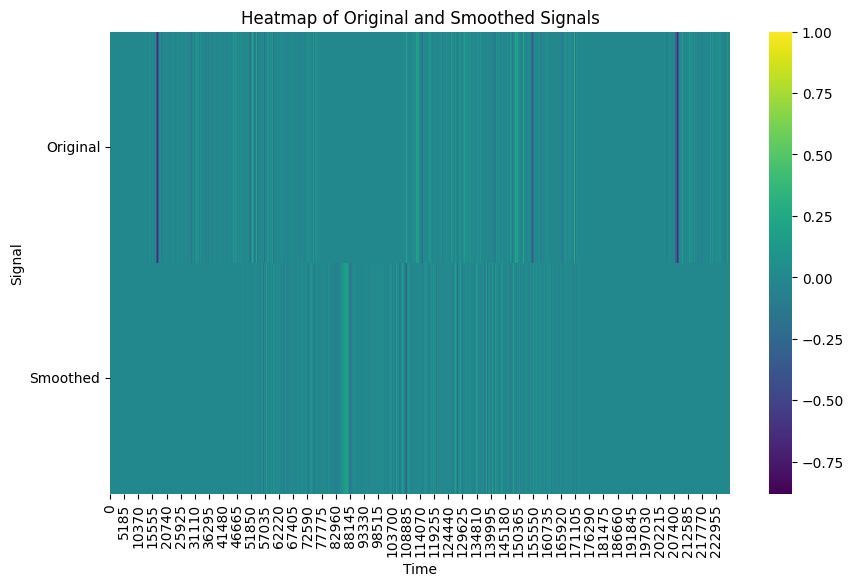

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming normalized_signal and smoothed_signal are 1D arrays
# If not, you might need to select a specific dimension or reshape them

# Reshape normalized_signal to have the same number of columns as smoothed_signal
normalized_signal = np.resize(normalized_signal, smoothed_signal.shape)

# Now you can stack them vertically
heatmap_data = np.vstack([normalized_signal, smoothed_signal])

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="viridis", cbar=True)
plt.title("Heatmap of Original and Smoothed Signals")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.yticks([0.5, 1.5], ["Original", "Smoothed"], rotation=0)
plt.show()